# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


import plotly.graph_objects as go
import plotly.express       as px

from plotly.subplots import make_subplots

In [2]:
pwd

'/home/ehgeraldo/repos/Well_Log_Plots_Applications'

In [3]:
ls -l

total 7220
-rw-rw-r-- 1 ehgeraldo ehgeraldo  478572 ago 29 18:51 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95928 ago 27 17:19 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  429306 ago 27 17:19 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395962 ago 27 17:19 c3.3-ehgeraldo_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201758 ago 29 17:10 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   33003 ago 29 20:00 c6.6-ehgeraldo_matplotlib_subplot.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo    4096 ago 29 19:57 data/


In [4]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Well_Logs_Plots/data/15_9-19A-CORE.csv')

In [5]:
df_raw.reset_index(inplace=True)

In [6]:
df_raw.head()

,index,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


# Data descrition

In [7]:
df1 = df_raw.copy()

## Data dimensions

In [8]:
print('Number of rows: {}'.format(df_raw.shape[0]))
print('Number of cols: {}'.format(df_raw.shape[1]))

Number of rows: 728
Number of cols: 15


## Data types

In [9]:
df1.dtypes

index          int64
DEPTH        float64
OrigDepth    float64
CORE_NO        int64
SAMPLE         int64
CKHG         float64
CKHL         float64
CKVG         float64
CKVL         float64
CPOR         float64
CPORV        float64
So           float64
Sw           float64
CGD          float64
CGDV         float64
dtype: object

## Check NAs 

In [10]:
df1.isna().sum()

index          0
DEPTH          0
OrigDepth      0
CORE_NO        0
SAMPLE         0
CKHG         171
CKHL         171
CKVG         587
CKVL         587
CPOR         135
CPORV        657
So           657
Sw           657
CGD          134
CGDV         657
dtype: int64

In [11]:
df1.sample().T

,558
index,558.0
DEPTH,3963.6
OrigDepth,3963.6
CORE_NO,6.0
SAMPLE,559.0
CKHG,122.0
CKHL,110.0
CKVG,108.0
CKVL,96.3
CPOR,22.8


## Replace NAs

In [12]:
#df1 = df1.dropna()

In [13]:
#df1.shape

In [14]:
#print('Removed data: {:.2f}%'.format( 1-( df1.shape[0] / df_raw.shape[0] ) ) )

In [15]:
df1.isna().sum()

index          0
DEPTH          0
OrigDepth      0
CORE_NO        0
SAMPLE         0
CKHG         171
CKHL         171
CKVG         587
CKVL         587
CPOR         135
CPORV        657
So           657
Sw           657
CGD          134
CGDV         657
dtype: int64

## Data Describe

In [16]:
df1.describe()

,index,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
count,728.000000,728.000000,728.000000,728.00000,728.000000,557.000000,557.000000,141.000000,141.000000,593.000000,71.000000,71.000000,71.000000,594.000000,71.000000
mean,363.500000,3920.528338,3920.153338,3.93956,364.500000,649.801463,627.972549,490.086071,472.875284,16.829342,19.497183,56.943662,28.309859,2.653569,2.656901
std,210.299786,46.545695,46.902816,1.75976,210.299786,2160.127387,2116.307023,1973.601098,1929.420018,6.552523,5.657763,21.084319,19.203758,0.046735,0.035560
min,0.000000,3838.600000,3837.000000,1.00000,1.000000,0.018000,0.010000,0.030000,0.017000,2.900000,2.700000,0.000000,4.500000,2.250000,2.620000
25%,181.750000,3882.580000,3881.980000,3.00000,182.750000,2.620000,2.030000,0.874000,0.590000,12.000000,18.150000,52.000000,18.200000,2.640000,2.630000
50%,363.500000,3921.725000,3921.125000,4.00000,364.500000,59.900000,52.300000,27.300000,23.300000,18.100000,21.200000,62.300000,22.800000,2.650000,2.650000
75%,545.250000,3960.287500,3960.487500,5.00000,546.250000,213.000000,194.000000,108.000000,96.300000,21.700000,23.500000,68.500000,29.950000,2.660000,2.660000
max,727.000000,3999.950000,3999.750000,7.00000,728.000000,20800.000000,20500.000000,14800.000000,14500.000000,36.000000,27.800000,86.000000,90.800000,3.030000,2.810000


## Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes('float64')

In [18]:
num_attributes.sample(2)

,DEPTH,OrigDepth,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
154,3875.95,3875.75,1.890,1.340,NaN,NaN,12.7,NaN,NaN,NaN,2.65,NaN
11,3840.80,3839.20,0.298,0.189,NaN,NaN,10.3,NaN,NaN,NaN,2.93,NaN


## Numerical Attributes

In [19]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,DEPTH,3838.600,3999.95,161.350,3920.528338,3921.725,46.513716,-0.061404,-1.159051
1,OrigDepth,3837.000,3999.75,162.750,3920.153338,3921.125,46.870592,-0.069337,-1.155375
2,CKHG,0.018,20800.00,20799.982,649.801463,NaN,2158.187443,5.376242,34.859277
3,CKHL,0.010,20500.00,20499.990,627.972549,NaN,2114.406432,5.419010,35.482375
4,CKVG,0.030,14800.00,14799.970,490.086071,NaN,1966.590059,5.643111,33.189321
5,CKVL,0.017,14500.00,14499.983,472.875284,NaN,1922.565929,5.659770,33.370662
6,CPOR,2.900,36.00,33.100,16.829342,NaN,6.546996,-0.389141,-0.529203
7,CPORV,2.700,27.80,25.100,19.497183,NaN,5.617778,-1.429381,1.618011
8,So,0.000,86.00,86.000,56.943662,NaN,20.935311,-1.411998,1.514488
9,Sw,4.500,90.80,86.300,28.309859,NaN,19.068041,1.691781,2.550176


## Data Plotting

In [21]:
df1.columns

Index(['index', 'DEPTH', 'OrigDepth', 'CORE_NO', 'SAMPLE', 'CKHG', 'CKHL',
       'CKVG', 'CKVL', 'CPOR', 'CPORV', 'So', 'Sw', 'CGD', 'CGDV'],
      dtype='object')

# Subplots 

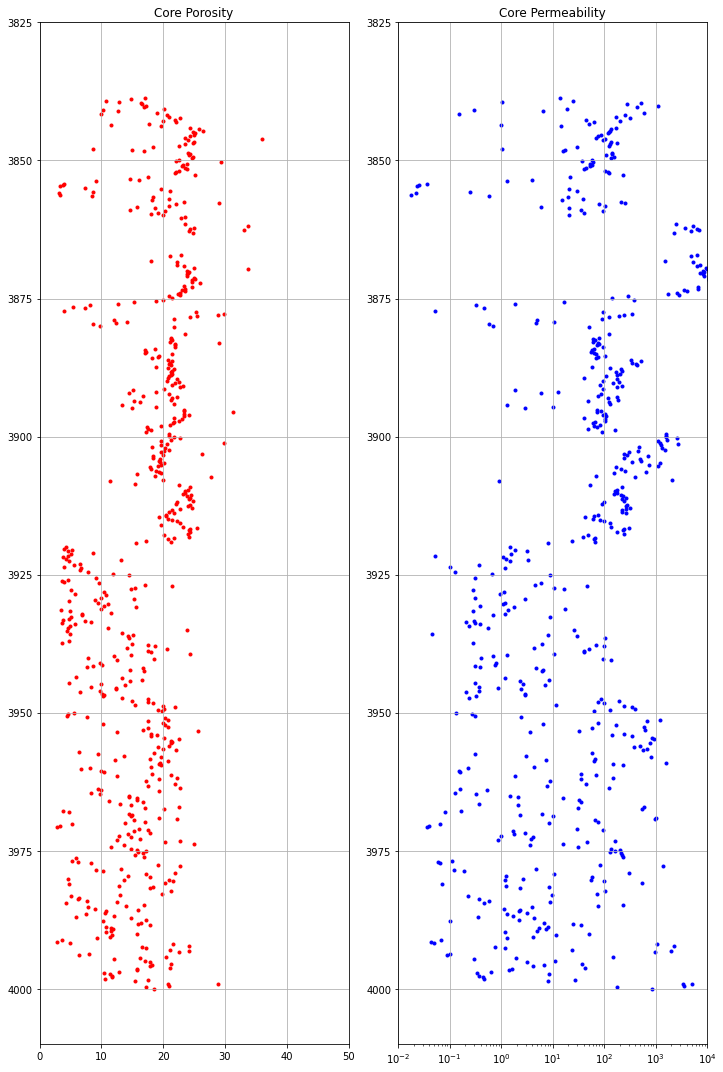

In [41]:
fig, ax = plt.subplots(figsize=(15,15))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)

# ax1 CPOR to DEPTH

ax1.scatter(df1['CPOR'], df1['DEPTH'], marker='.', c='red')
ax1.set_xlim(0,50)
ax1.set_ylim(4010,3825)
ax1.set_title('Core Porosity')
ax1.grid()

# ax2 CKHG  to DEPTH

ax2.scatter(df1['CKHG'], df1['DEPTH'], marker='.', c='blue')
ax2.set_xlim(0.01,10000)
ax2.semilogx()
ax2.set_ylim(4010,3825)
ax2.set_title('Core Permeability')
ax2.grid()



plt.tight_layout()
plt.show()

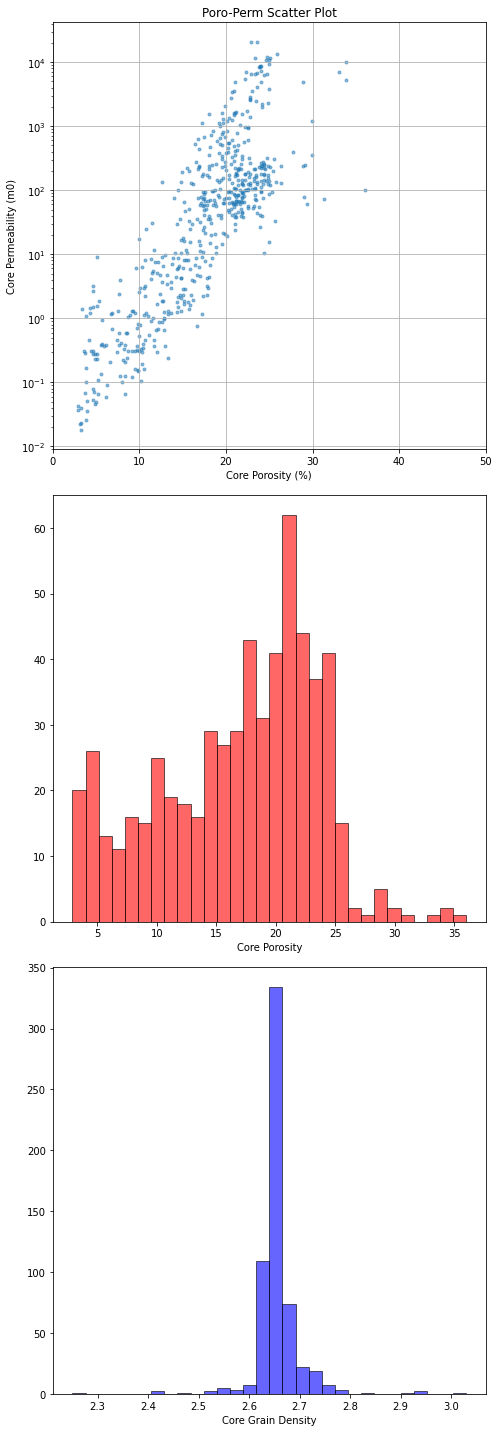

In [44]:
fig, ax = plt.subplots(figsize=(20,20))

ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2))

# ax3 CPOR to CKHG

ax3.scatter(df1['CPOR'], df1['CKHG'], marker='.', alpha=0.5)
ax3.semilogy()
ax3.set_xlim(0.01,10000)
ax3.set_xlim(0,50)
ax3.set_title('Poro-Perm Scatter Plot')
ax3.set_xlabel('Core Porosity (%)')
ax3.set_ylabel('Core Permeability (m0)')
ax3.grid()

# ax4 Histogram CPOR

ax4.hist(df1['CPOR'], bins=30, edgecolor='black', color='red', alpha=0.6)
ax4.set_xlabel('Core Porosity')

# ax5 Histogram CGD

ax5.hist(df1['CGD'], bins=30, edgecolor='black', color='blue', alpha=0.6)
ax5.set_xlabel('Core Grain Density')



plt.tight_layout()
plt.show()

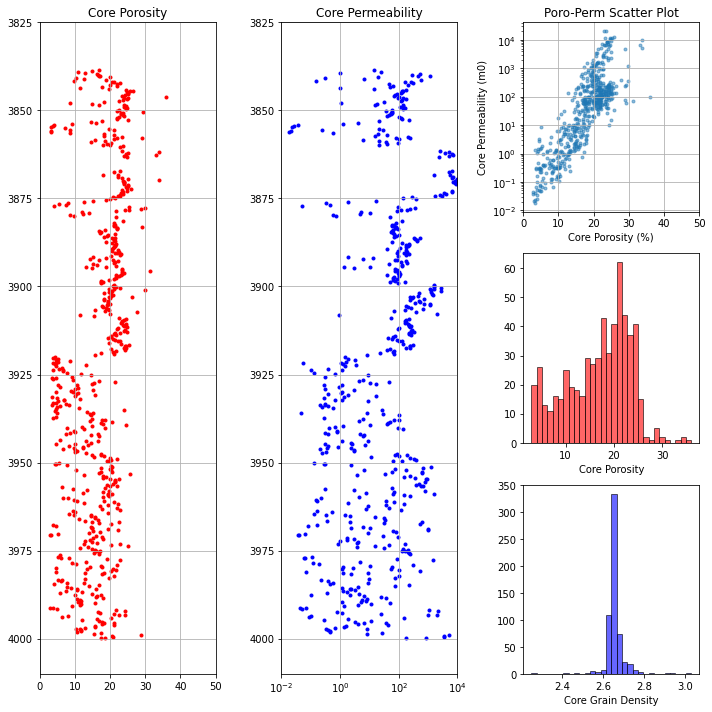

In [36]:
fig, ax = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2))

# ax1 CPOR to DEPTH

ax1.scatter(df1['CPOR'], df1['DEPTH'], marker='.', c='red')
ax1.set_xlim(0,50)
ax1.set_ylim(4010,3825)
ax1.set_title('Core Porosity')
ax1.grid()

# ax2 CKHG  to DEPTH

ax2.scatter(df1['CKHG'], df1['DEPTH'], marker='.', c='blue')
ax2.set_xlim(0.01,10000)
ax2.semilogx()
ax2.set_ylim(4010,3825)
ax2.set_title('Core Permeability')
ax2.grid()

# ax3 CPOR to CKHG

ax3.scatter(df1['CPOR'], df1['CKHG'], marker='.', alpha=0.5)
ax3.semilogy()
ax3.set_xlim(0.01,10000)
ax3.set_xlim(0,50)
ax3.set_title('Poro-Perm Scatter Plot')
ax3.set_xlabel('Core Porosity (%)')
ax3.set_ylabel('Core Permeability (m0)')
ax3.grid()

# ax4 Histogram CPOR

ax4.hist(df1['CPOR'], bins=30, edgecolor='black', color='red', alpha=0.6)
ax4.set_xlabel('Core Porosity')

# ax5 Histogram CGD

ax5.hist(df1['CGD'], bins=30, edgecolor='black', color='blue', alpha=0.6)
ax5.set_xlabel('Core Grain Density')



plt.tight_layout()
plt.show()